# 💬 Conscious Chatbot Internals
## Phase 1 Application: Real-Time Thought Visualization

This notebook demonstrates a practical application of the cognitive architecture: a **Conscious Chatbot**.

Unlike standard LLMs which are "black boxes", this agent exposes its internal cognitive state in real-time.

### Architecture

The `ConsciousChatbot` wraps the `BicameralAgent` with a text interface:
1.  **Input:** User text is embedded into a vector.
2.  **Perception:** This vector enters the Global Workspace.
3.  **Cognition:**
    *   **System 1:** Generates an immediate intuitive response.
    *   **System 2:** Monitors confidence. If low, it triggers a "pause" to retrieve relevant memories or deliberate.
4.  **Output:** The final workspace state is decoded back into text.

### Visualization

We visualize the **Global Workspace State** (128 dimensions) as a heatmap. This represents the "Stream of Consciousness"—the evolving thought pattern of the AI as it processes your input.


In [11]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlx.core as mx

sys.path.append(os.getcwd())
if os.path.exists('consciousness_research'):
    sys.path.append('consciousness_research')

from conscious_chatbot import ConsciousChatbot

# Initialize
bot = ConsciousChatbot()
print("🤖 Chatbot ready.")

⚠️  Memory dimension mismatch on load (256D → 128D). Clearing old memories.
🤖 Chatbot ready.


## Interactive Chat Loop

Run the cell below to chat. It will display the **Global Workspace** activation for each of your inputs.

👤 You: Hello there!


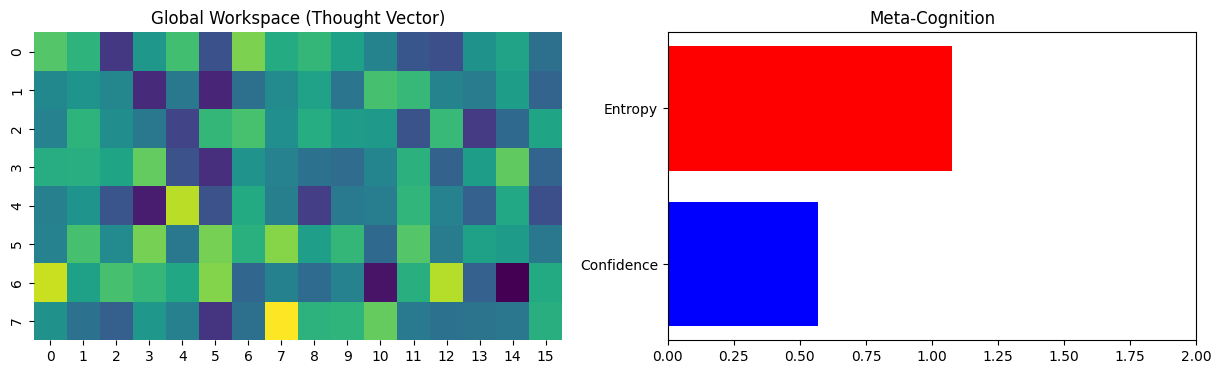

🤖 Bot: Hi!
💭 (Confidence: 0.57, Entropy: 1.08, Action: 0)
--------------------------------------------------------------------------------
👤 You: What is the weather?


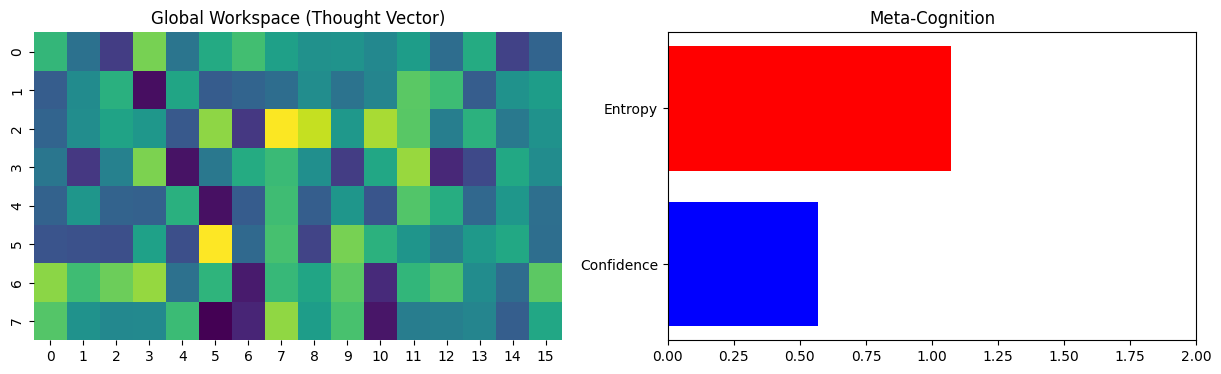

🤖 Bot: Hello there!
💭 (Confidence: 0.57, Entropy: 1.07, Action: 0)
--------------------------------------------------------------------------------
👤 You: Why is the sky blue?


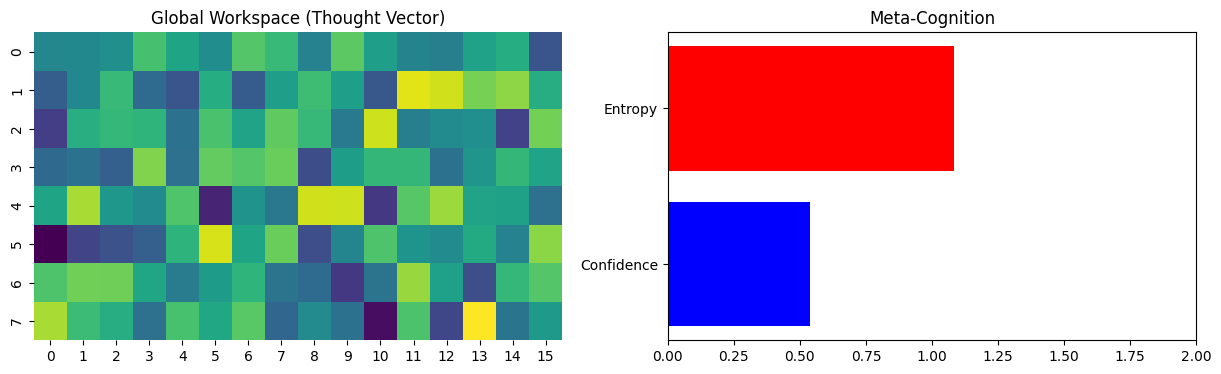

🤖 Bot: Hello there!
💭 (Confidence: 0.54, Entropy: 1.08, Action: 0)
--------------------------------------------------------------------------------


In [10]:
def visualize_thought(text_input):
    print(f"👤 You: {text_input}")
    
    # Process
    result = bot.chat(text_input)
    state = result['internal_state']
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    
    # 1. Global Workspace State (128 dimensions reshaped to 8x16)
    workspace = np.array(state['state'])
    sns.heatmap(workspace.reshape(8, 16), ax=ax1, cmap="viridis", cbar=False)
    ax1.set_title("Global Workspace (Thought Vector)")
    
    # 2. System 2 Confidence
    conf = state['confidence'].item()
    ent = state['entropy'].item()
    
    # Gauge chart style
    ax2.barh(['Confidence', 'Entropy'], [conf, ent], color=['blue', 'red'])
    ax2.set_xlim(0, 2.0) # Entropy can be > 1
    ax2.set_title("Meta-Cognition")
    
    plt.show()
    
    print(f"🤖 Bot: {result['response']}")
    print(f"💭 (Confidence: {conf:.2f}, Entropy: {ent:.2f}, Action: {state['action']})")

# Interactive test
test_inputs = [
    "Hello there!",
    "What is the weather?",
    "Why is the sky blue?"
]

for msg in test_inputs:
    visualize_thought(msg)
    print("-" * 80)

## Phase 5: Hardware-Aware Chatbot

We now upgrade the chatbot to use the **Heterogeneous Agent** (NPU + GPU).
*   **System 1 (NPU):** Handles routine chit-chat instantly.
*   **System 2 (GPU):** Kicks in when the agent is uncertain or needs to "think" deeply.

This demonstrates the **Dual-Process Theory** in action on Apple Silicon.


In [9]:
from conscious_chatbot import ConsciousChatbot
import matplotlib.pyplot as plt

# Initialize Hardware-Aware Bot
# Note: This requires the 'heterogeneous_architecture.py' module to be working
try:
    hw_bot = ConsciousChatbot(use_heterogeneous=True)

    print("\n--- Hardware-Aware Chat Session ---")
    # We mix simple greetings (easy) with ambiguous queries (hard)
    inputs = ["Hello!", "What is the meaning of life?", "Tell me a fact.", "Weather?"]

    for msg in inputs:
        print(f"\nUser: {msg}")
        result = hw_bot.chat(msg)
        
        # Check which system was used
        state = result['internal_state']
        used_sys2 = state.get('used_system2', False)
        
        if used_sys2:
            print("🔴 SYSTEM 2 (GPU) ACTIVATED: Deliberation required.")
        else:
            print("🟢 SYSTEM 1 (NPU) RESPONSE: Intuitive & Fast.")
            
        print(f"🤖 Bot: {result['response']}")
        if result['thought_process']:
            print(f"💭 {result['thought_process']}")
            
except ImportError:
    print("Heterogeneous Agent not found. Please ensure Phase 4 is implemented.")
except Exception as e:
    print(f"Error initializing Hardware-Aware Bot: {e}")


🚀 Initializing Heterogeneous Agent (NPU + GPU)...
🔧 Quantizing System 1 for Neural Engine...
   Original: 67,072 bytes
   Quantized: 20,960 bytes
   Compression: 3.20x

🧠 Heterogeneous Agent Initialized
   System 1: Quantized (NPU-ready)
   System 2: Full Precision (GPU)
   State Dim: 128D
   Action Dim: 3

--- Hardware-Aware Chat Session ---

User: Hello!
🟢 SYSTEM 1 (NPU) RESPONSE: Intuitive & Fast.
🤖 Bot: Greetings.

User: What is the meaning of life?
🟢 SYSTEM 1 (NPU) RESPONSE: Intuitive & Fast.
🤖 Bot: Hi!

User: Tell me a fact.
🟢 SYSTEM 1 (NPU) RESPONSE: Intuitive & Fast.
🤖 Bot: Hi!

User: Weather?
🟢 SYSTEM 1 (NPU) RESPONSE: Intuitive & Fast.
🤖 Bot: Hi!
